In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
housing_data = pd.read_csv('datasets/housing.csv')

housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18655,-121.97,36.98,17.0,2813.0,497.0,1337.0,477.0,3.7083,252400.0,NEAR OCEAN
11131,-117.93,33.85,31.0,2149.0,465.0,966.0,302.0,3.8750,183900.0,<1H OCEAN
17177,-122.48,37.51,22.0,1564.0,278.0,761.0,270.0,4.7578,318500.0,NEAR OCEAN
14316,-117.14,32.70,36.0,633.0,148.0,557.0,139.0,1.5729,82700.0,NEAR OCEAN
10755,-117.89,33.61,45.0,1883.0,419.0,653.0,328.0,4.2222,500001.0,<1H OCEAN


In [10]:
housing_data= housing_data.dropna()

In [11]:
housing_data.shape

(20433, 10)

In [12]:
#we had seen a cap around 5000001. We use this cmd to see how many records in the data set have median house value of 500001
housing_data.loc[housing_data['median_house_value'] == 500001].count()
#nearly 1000 recors out of 20000 records are at this upper cap of hpuse price
#This type of data can skew the training of our Ml model hence it is best to drop them
#Working with skewed datasets where there is lots of data clustred around a single value or in a single class

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [13]:
#ignore the clustering data
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [14]:
housing_data.shape

(19475, 10)

In [15]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
#All features have numeric value except ocean_proximity. It contains categorial or discrete values not numbers
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [17]:
#We need to convert string values in numeric. We can use one-hot encoding to convert ocean_proximity column to numeric form
# use pd.get_dummies function for this. It will convert the column to one-hot form and remove original column
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [18]:
housing_data.shape

(19475, 14)

In [19]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
8888,-118.49,34.03,31.0,4949.0,1293.0,1985.0,1244.0,4.2520,436700.0,1,0,0,0,0
10251,-117.87,33.89,17.0,1441.0,530.0,769.0,456.0,2.4250,171700.0,1,0,0,0,0
7000,-118.04,33.96,42.0,1430.0,338.0,1269.0,321.0,3.3214,148800.0,1,0,0,0,0
2206,-119.88,36.83,2.0,4055.0,735.0,1730.0,654.0,4.2132,96500.0,0,1,0,0,0
19086,-122.50,38.40,36.0,1860.0,364.0,777.0,339.0,4.1307,295700.0,1,0,0,0,0


In [20]:
#X values are features or data used to train the model. X values are all of are input columns except median_house_value
#Y values are our predictions. Y values are target
X = housing_data.drop('median_house_value', axis = 1)
Y = housing_data['median_house_value']

In [21]:
#Names of features used to train the model
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [22]:
# split data into test set and training set
#training set is used to train the model. Test data is a little bit of original dataset that we will hold out, that we wont let the model see during training phase
# test data- measures how well trained model performs on instances it has never seen before
#test_train_split function in scikit allows to quickly split up the data into traing set and test set
# typically we do 80/20 split for train and test
#data is shuffled

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size =0.2)

In [23]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [24]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [51]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize = True).fit(x_train, y_train)

In [48]:
print("Training_score: ", linear_model.score(x_train, y_train))

Training_score:  0.6127307959181121


In [49]:
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [50]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

longitude                    -2.410835e+04
latitude                     -2.226592e+04
population                   -2.933707e+01
total_rooms                  -7.963352e+00
households                    4.362572e+01
total_bedrooms                9.334089e+01
housing_median_age            9.494235e+02
median_income                 3.873515e+04
ocean_proximity_INLAND        1.508484e+17
ocean_proximity_NEAR BAY      1.508484e+17
ocean_proximity_<1H OCEAN     1.508484e+17
ocean_proximity_NEAR OCEAN    1.508484e+17
ocean_proximity_ISLAND        1.508484e+17
dtype: float64


In [52]:
y_pred = linear_model.predict(x_test)

In [53]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
10595,311520.0,326100.0
11082,289152.0,230900.0
1723,124352.0,80400.0
1011,175744.0,172500.0
1919,92384.0,128600.0
4912,133696.0,114100.0
15141,163872.0,153800.0
16570,159008.0,121400.0
3525,238144.0,222500.0
8186,276992.0,249400.0


In [54]:
from sklearn.metrics import r2_score
print("Testing_score: ", r2_score(y_test, y_pred))

Testing_score:  0.6131297234112145


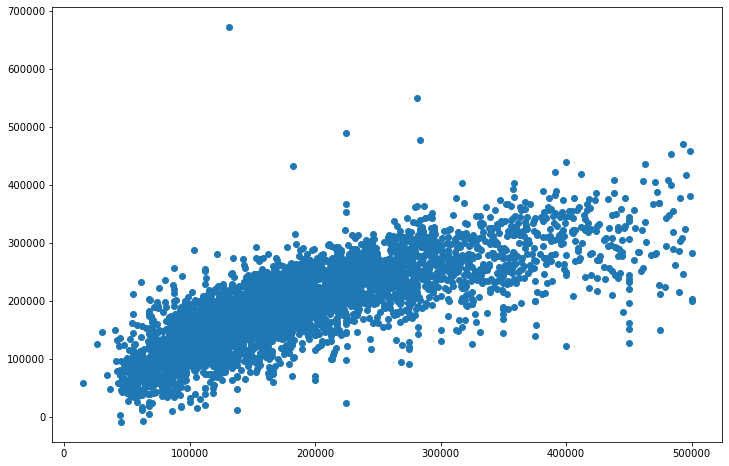

In [55]:
fig, ax = plt.subplots(figsize =(12, 8))
plt.scatter(y_test, y_pred)
plt.show()

In [58]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [59]:
df_pred_actual_sample.head()

,index,predicted,actual
0,20086,81856.0,153500.0
1,1732,162048.0,113600.0
2,16526,174816.0,101800.0
3,6100,240352.0,168800.0
4,8156,245728.0,218200.0


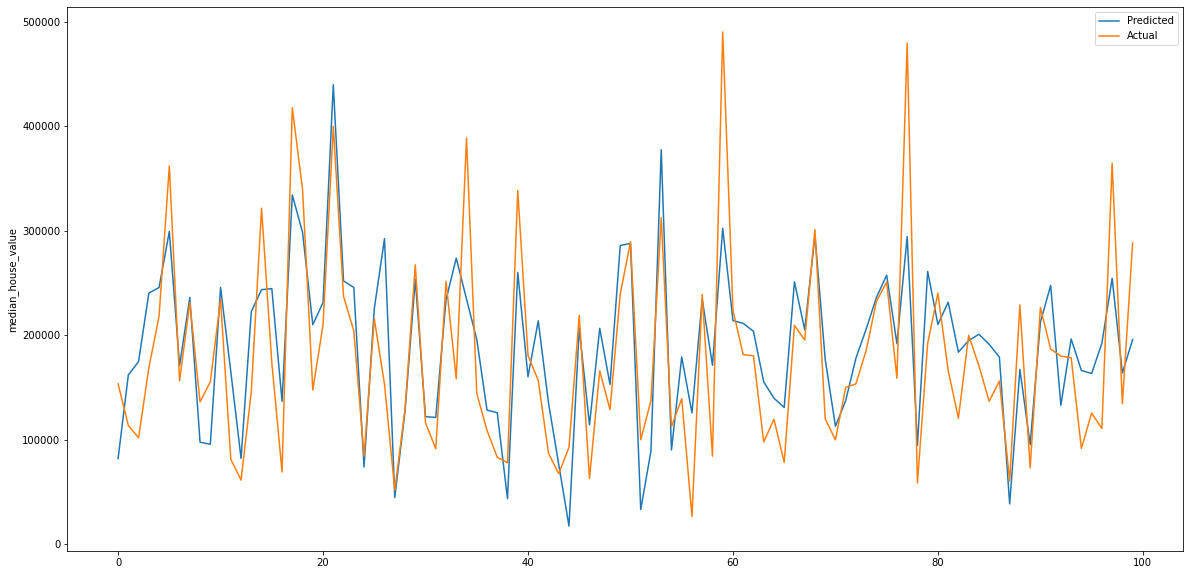

In [60]:
plt.figure(figsize=(20,10))
plt.plot(df_pred_actual_sample['predicted'], label ='Predicted')
plt.plot(df_pred_actual_sample['actual'], label ='Actual')
plt.ylabel('median_house_value')

plt.legend()
plt.show()

In [117]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(x_train,y_train)
reg_score = r2_score(linear_reg.predict(x_test),y_test) 

In [63]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtReg = DecisionTreeRegressor(max_depth=9)
dtReg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [64]:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(presort=False)

In [73]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
y_predict = dtReg.predict(x_test)
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

53906.254129809604
0.688600206646292


Text(0.5, 1.0, 'feature importance')

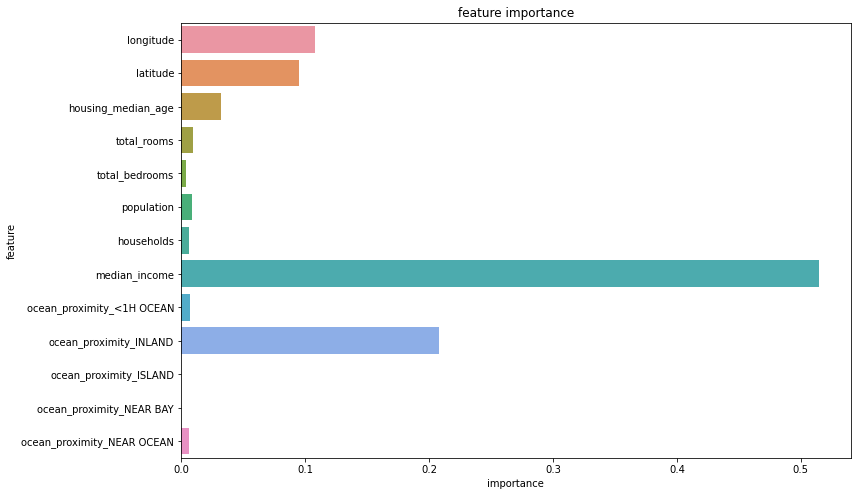

In [87]:
plt.figure(figsize=(12,8))
data=pd.DataFrame({'feature':housing_data.columns[housing_data.columns!='median_house_value'].values,"importance":dtReg.feature_importances_})
sns.barplot(data=data,y='feature',x='importance')
plt.title('feature importance')

In [108]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)
tree_score = r2_score(tree_reg.predict(x_test),y_test) 

In [79]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor 
rfreg=RandomForestRegressor()
rfreg.fit(x_train,y_train)

RandomForestRegressor()

In [81]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

RandomForestRegressor(n_estimators=10)

In [82]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
y_predict = rfreg.predict(x_test)
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

43301.67692277384
0.7990678449980895


In [109]:
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train,y_train)
forest_score = r2_score(forest_reg.predict(x_test),y_test) 

<AxesSubplot:title={'center':'Feature Importance'}>

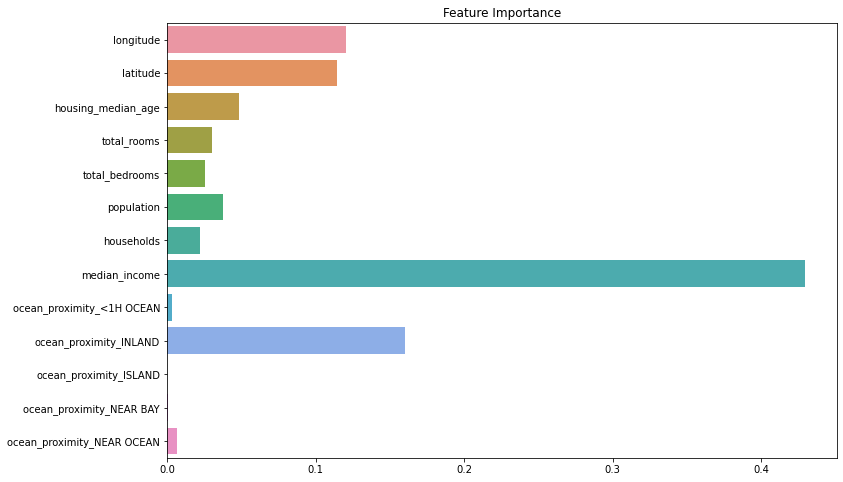

In [89]:
plt.figure(figsize=(12,8))
plt.title('Feature Importance')

sns.barplot(data={'importance':rfreg.feature_importances_,'feature':housing_data.columns[housing_data.columns!='median_house_value']},y='feature',x='importance')

In [96]:
#Ridge Regression (determine which variables should be retained in the model):
from sklearn.linear_model import Ridge
ridgereg=Ridge(alpha=0.001,normalize=True)
ridgereg.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_test,ridgereg.predict(x_test))))
print('R2 Value/Coefficient of determination:{}'.format(ridgereg.score(x_test,y_test)))

60085.76227945538
R2 Value/Coefficient of determination:0.6131138687735123


In [114]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(random_state=19) 
ridge_reg.fit(x_train,y_train)
ridge_score = r2_score(ridge_reg.predict(x_test),y_test)

In [118]:
data = [reg_score, ridge_score, tree_score, forest_score]
index = ['Linear Regression', 'Ridge Regression', 'Decision Tree Regressor', 'Random Forest Regressor']
pd.DataFrame(data, index=index, columns=['Scores']).sort_values(ascending = False, by=['Scores'])

,Scores
Random Forest Regressor,0.740078
Decision Tree Regressor,0.612247
Linear Regression,0.370633
Ridge Regression,0.369813
